# San Francisco Bay Bike-Sharing System Trip Characteristics
## by (Robert Gonpou Mesleh Jr)

## Investigation Overview

In this investigation, I want to look at when are most trips taken in the bike-sharing system covering the greater San Francisco Bay area, in terms of the time of day and day of the week. I also want to look at the average duration of the trips.

## Dataset Overview

The Ford GoBike dataset containes ride information about 183,412 trips made in a bike-sharing system covering the greater San Francisco Bay area. The datases contians trip information such as the date, duration, gender, birth year, and more. 8939 records with member year of birth older than 1950 were removed from the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Correct variables data types
# create a list of the date columns that needs the data type changed
date_vars = ['start_time','end_time']

# use a for loop to change the columns data type to datetime
for columns in date_vars:
    df[columns] = pd.to_datetime(df[columns]);

# create a list of the integer columns that needs the data type changed
integer_vars = ['start_station_id','end_station_id','member_birth_year']

# using a for loop to change the columns data type to integer
for columns in integer_vars:
    df[columns] = df[columns].fillna(0).astype(int)

In [4]:
# Separate start_time and end_time columns into year, month, day, hour, and day of week
df['ride_year']= df['start_time'].dt.year
df['start_month']= df['start_time'].dt.month
df['start_day']= df['start_time'].dt.day
df['start_hour']= df['start_time'].dt.hour
df['start_weekday']= (df['start_time']).dt.day_name()
df['duration_mins']= (df['duration_sec']) / 60

In [5]:
# Dropping riders with birth year older then 1950
df.drop(df[df['member_birth_year'] < 1950].index, inplace = True)

In [6]:
def figure_size(w,h):
    # calling figsize parameters
    return plt.figure(figsize=(w,h))

In [7]:
def plt_labels(t,y,x):
    return plt.title(t),plt.ylabel(y),plt.xlabel(x)

## Bikers Demography - Gender and Rider Type

The first visual, describes the demography of the San Francisco Bay area bikers, looking at the gender distribution and rider type. Males are two time more than the number of female riders. Bikers are classified into two categories. Subscribers are 7 times as much as customers; subscribers being those with annual subscription while customers typically have 24hrs to 3days pass.

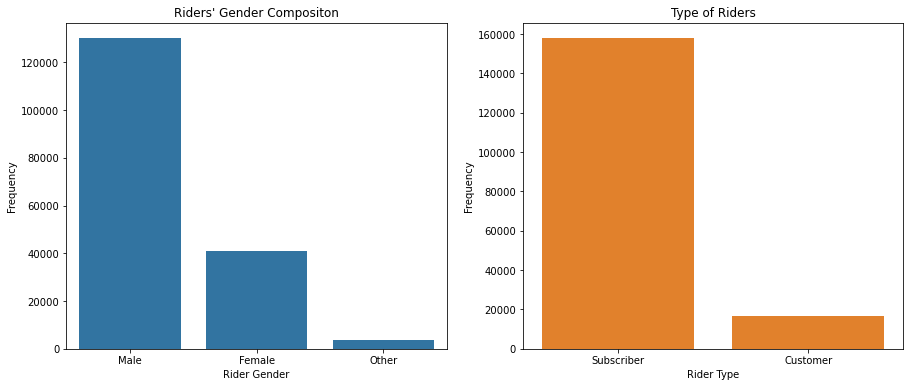

In [8]:
figure_size(15,6);

# Plotting riders gender
plt.subplot(1,2,1)
arrange = df.member_gender.value_counts().index
pcolor = sb.color_palette()[0]
sb.countplot(data=df, x='member_gender', color = pcolor, order = arrange)
plt_labels('Riders\' Gender Compositon','Frequency','Rider Gender');

# Plotting the user type of the riders
plt.subplot(1,2,2)
arrange = df.user_type.value_counts().index
pcolor = sb.color_palette()[1]
sb.countplot(data=df, x='user_type', color = pcolor, order = arrange)
plt_labels('Type of Riders','Frequency','Rider Type');

## Bikers Demography - Top 10 Year of Birth

This slide describes the top 10 birth year of the bikers. It provides an idication of which ages took the most rides in the San Francisco Bay area. Most riders were born between 1986 and 1995, with people from 1988 taking the most trip.

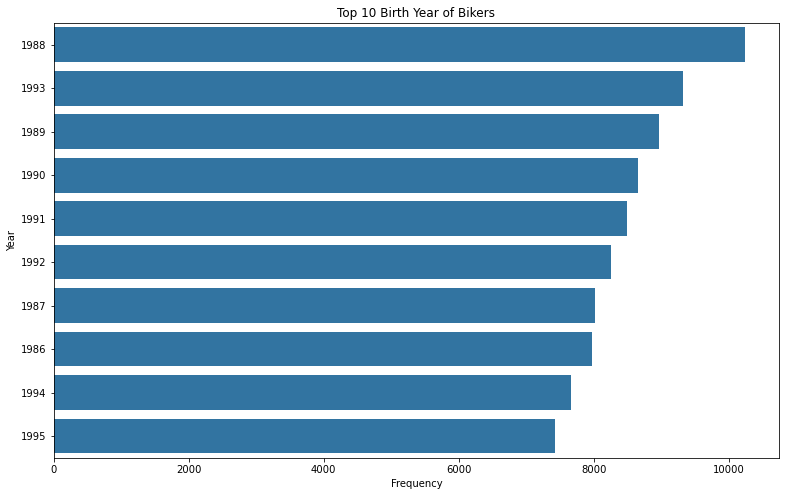

In [9]:
figure_size(13,8);
arrange = df.member_birth_year.value_counts().iloc[:10].index
pcolor = sb.color_palette()[0]
sb.countplot(data=df, y='member_birth_year', color = pcolor, order = arrange)
plt_labels('Top 10 Birth Year of Bikers','Year','Frequency');

## Most Trips  - Month Days and Hours

When are most trips taken during the month and during the day? More trips are taken in the last week for the month, with the highest number of trips were taken on the 28th. Most of the high trips appears to taken during specific days of the week. 

Most riders prefer to take their trips between 4:00pm - 6:00pm and 7:00am and 9:00am, with the most prefered time being 17:00hr.

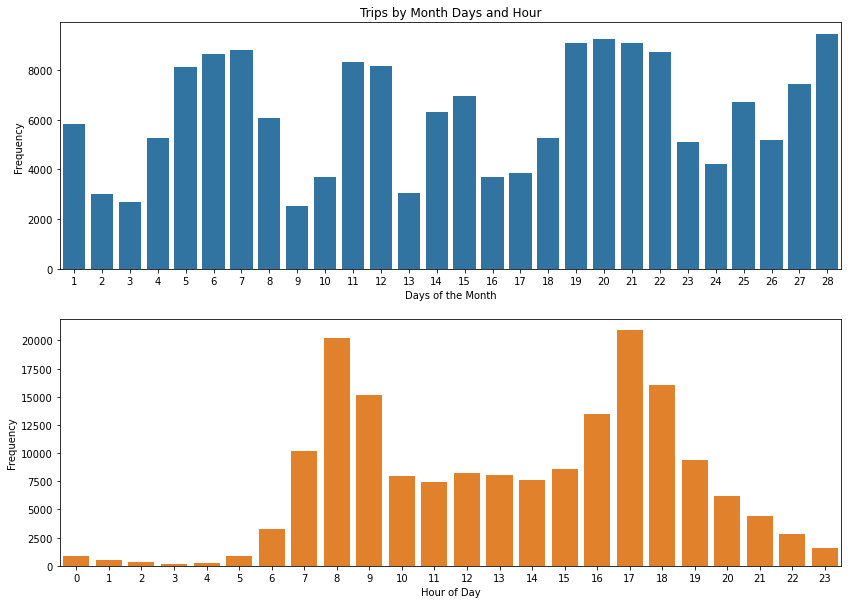

In [10]:
figure_size(14,10);

# Plotting riders gender
plt.subplot(2,1,1)
# Ploting frequency of each day of the month in order of first to last day
pcolor = sb.color_palette()[0]
sb.countplot(data=df, x='start_day', color = pcolor)
plt_labels('Trips by Month Days and Hour','Frequency','Days of the Month');

# Plotting hours of the day in order from midnight to 23;00 hours
plt.subplot(2,1,2)
pcolor = sb.color_palette()[1]
sb.countplot(data=df, x='start_hour', color = pcolor);
plt_labels('','Frequency','Hour of Day');

## Weekday With the Most Trips

When are most trips taken during the week? The results show that the most rides are on Thursdays. Despite Saturday and Sunday being weekend days where people are supposed to be free from work or school and engage is extra activties, they have the lowest number of trips.

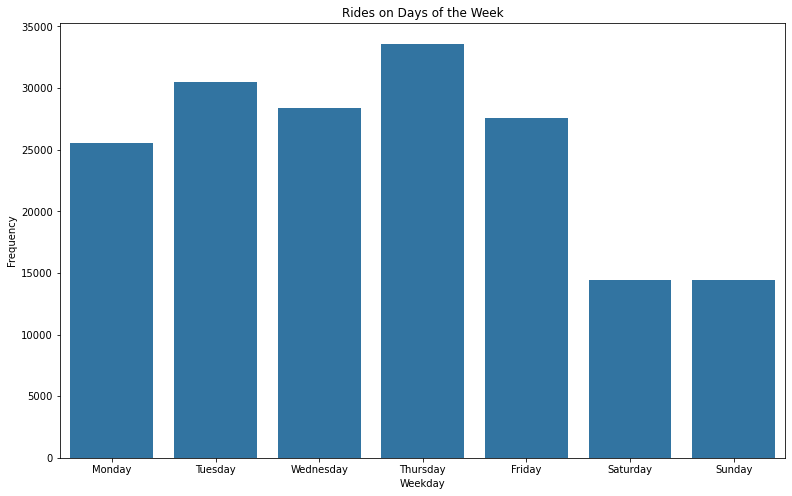

In [11]:
# Ploting frequency of weekdays in order
figure_size(13,8);
pcolor = sb.color_palette()[0]
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data = df, x='start_weekday', color = pcolor, order = weekdays)
plt_labels('Rides on Days of the Week','Frequency','Weekday');

## Average Trip Duration

Saturday and Sunday have the highest trip durations despite having the least number of trips. Despite annual subscriber riders being six times more than short-term customers, they did not account more most of the the long rides on the trips. Females also rode loger than males, though males made more trips.

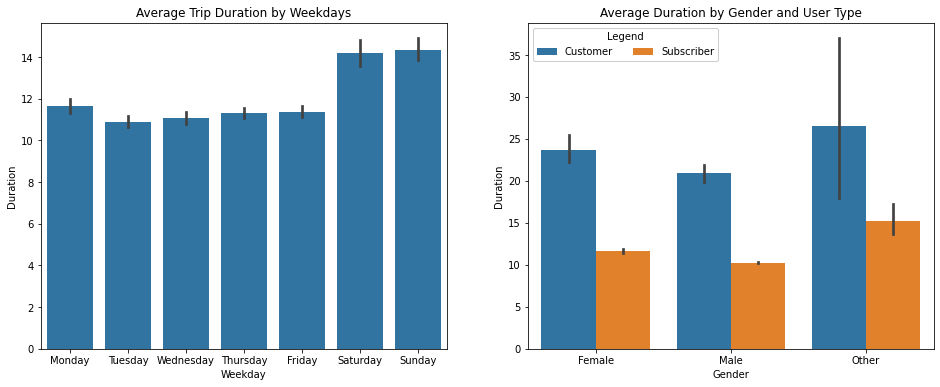

In [12]:
figure_size(16,6);

# Plotting average trip duration by weekdays
plt.subplot(1,2,1)
color = sb.color_palette()[0]
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.barplot(data = df, x = 'start_weekday', y = 'duration_mins', order = weekdays, color = color)
plt.xticks(rotation=0)
plt_labels('Average Trip Duration by Weekdays','Duration','Weekday');

# Plotting average trip duration by Gender and User Type
plt.subplot(1,2,2)
agu = sb.barplot(data = df, x = 'member_gender', y = 'duration_mins', hue = 'user_type', order = ['Female','Male','Other'])
agu.legend(loc = 2, ncol = 3, framealpha = 2, title = 'Legend')
plt_labels('Average Duration by Gender and User Type','Duration','Gender');

In [ ]:
!jupyter nbconvert Part_II_Explanation_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_Explanation_slide_deck.ipynb to slides
[NbConvertApp] Writing 681536 bytes to Part_II_Explanation_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Explanation_slide_deck.slides.html
Use Control-C to stop this server
